In [3]:
import pandas as pd
import numpy as np
import random
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# pandas is useful for data manipulation and analysis
# we use the read_csv function inside the pandas library to read the dataset downloaded
# we have to specify the file path
train = pd.read_csv('Data_Set/sign_mnist_train.csv')
valid = pd.read_csv('Data_Set/sign_mnist_test.csv')

# we use the array function inside the numpy library to convert the data set to numpy arrays
train_data = np.array(train, dtype = 'float32')
valid_data = np.array(valid, dtype = 'float32')

Label for the image/sign is: U


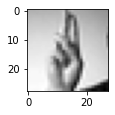

In [8]:
# Plot a few images and label
# The main purpose of this block of code is to check whether our data has been properly read and is working

# List of alphabets according to the numbers assigned inside the labels, 0 for A, 1 for B and so on
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# this is to generate a number between 1 and the total number of rows that exist in the training set
# basically load an image data from all the images available in csv format 
i = random.randint(1, train.shape[0])
fig1, ax1 = plt.subplots(figsize = (1.5, 1.5))

# [i, 1:] is used to take the entire pixel array after the first column, as first column is for label
# we use reshape (28, 28) to display it in the form of 28 * 28, to view the image
plt.imshow(train_data[i, 1:].reshape((28, 28)), cmap = 'gray')
# priniting the alphabet for which the sign stands for train_data[i, 0] gives us the numerical value stored in that row
print("Label for the image/sign is:", class_names[int(train_data[i, 0])])

Text(0.5, 1.0, 'Label')

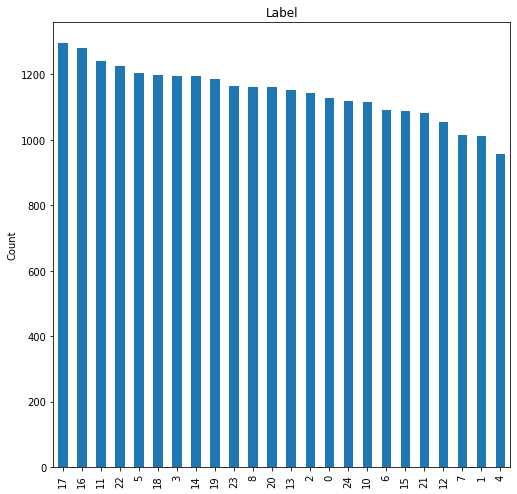

In [5]:
# Data distribution and visualization
# This is a good method to check whether the data set is balanced or not

fig = plt.figure(figsize = (18, 18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind = 'bar', ax = ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [6]:
# Now that we have loaded and checked that our data is loading normally and is balanced, we need to prepare it before giving it to the model
# this involves splitting the data into x_train and y_train
# normalising the input data
# reshaping the input data
# one-hot encoding the labels data set as the loss function that we are using is cross categorical entropy

# here we split the data, removing the labels column
x_train = train_data[:, 1:]
x_valid = valid_data[:, 1:]

# normalising the input data
x_train = x_train / 255
x_valid = x_valid / 255

# reshaping the input data
# the first parameter -1, specifies that the number of row vectors must be dynamically calculated
# think of it as n, next are dimensions and the number of channels
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)

# assigning labels as the y_train
y_train = train_data[:, 0]
y_valid = valid_data[:, 0]

# one-hot encoding the data
num_classes = 25
y_train_cat = keras.utils.to_categorical(y_train, num_classes = 25)
y_valid_cat = keras.utils.to_categorical(y_valid, num_classes = 25)

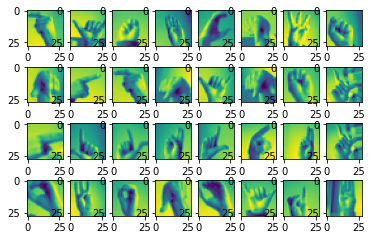

In [7]:
# Now that we have prepared our data, we must augment it
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# to do that we use the ImageDataGenerator available in the keras module

datagen = ImageDataGenerator(
rotation_range = 10, # rotates images by specified angle, can be between 0 to 180
zoom_range = 0.1, # zooms an image
width_shift_range = 0.1, # randomly shifts images horizontally by specified fraction of total width
height_shift_range = 0.1, # randomly shifts images vertically by specified fraction of total height
horizontal_flip = True, # randomly flip images horizontally 
vertical_flip = False # do not flip any of the images vertically
)

# here vertically flipping in the images makes no sense, as the signs will never be inverted vertically
# but flipping the images horizontally makes sense, as the people might be left handed

# checking if data augmentation is working properly or not
batch_size = 32
img_iter = datagen.flow(x_train, y_train_cat, batch_size = batch_size)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows = 4, ncols = 8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

# fitting the generator onto the training data
datagen.fit(x_train)

In [14]:
# Now that our data is completely ready, well-augmented and normalised
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense)
# it is time to create our Model

Model = Sequential()
Model.add(Conv2D(75, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
Model.add(BatchNormalization())
Model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))
Model.add(Conv2D(50, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
Model.add(Dropout(0.2))
Model.add(BatchNormalization())
Model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))
Model.add(Conv2D(25, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
Model.add(BatchNormalization())
Model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))
Model.add(Flatten())
Model.add(Dense(units = 512, activation = "relu"))
Model.add(Dropout(0.3))
Model.add(Dense(units = num_classes, activation = "softmax"))


In [15]:
# compiling the model

Model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [16]:
# Training the formed model finally
# Normally we would pass the x_train and y_train_cat to the function
# but incase of data augmentation, we pass the generator along with the input data but specify the number of iterations in an epoch
# otherwise the epoch will never end as the generator can generate infinite number of augmented images

Model.fit(img_iter, epochs = 20, steps_per_epoch = len(x_train) / batch_size, validation_data = (x_valid, y_valid_cat))

Epoch 1/20
857/857 [==============================] - 61s 70ms/step - loss: 1.1374 - accuracy: 0.6347 - val_loss: 0.4047 - val_accuracy: 0.8641
Epoch 2/20
857/857 [==============================] - 58s 67ms/step - loss: 0.3378 - accuracy: 0.8867 - val_loss: 0.1848 - val_accuracy: 0.9279
Epoch 3/20
857/857 [==============================] - 59s 69ms/step - loss: 0.2102 - accuracy: 0.9286 - val_loss: 1.8518 - val_accuracy: 0.7131
Epoch 4/20
857/857 [==============================] - 59s 69ms/step - loss: 0.1615 - accuracy: 0.9471 - val_loss: 1.0661 - val_accuracy: 0.7322
Epoch 5/20
857/857 [==============================] - 55s 64ms/step - loss: 0.1348 - accuracy: 0.9567 - val_loss: 0.2560 - val_accuracy: 0.9083
Epoch 6/20
857/857 [==============================] - 58s 68ms/step - loss: 0.1120 - accuracy: 0.9641 - val_loss: 0.0858 - val_accuracy: 0.9647
Epoch 7/20
857/857 [==============================] - 58s 68ms/step - loss: 0.0998 - accuracy: 0.9693 - val_loss: 0.8669 - val_accuracy:

In [17]:
# saving the model

Model.save('ASL_Model')

INFO:tensorflow:Assets written to: ASL_Model\assets
